## Introduction

In this lab, We will analyze the top 10 areas of Bangalore. This will help mainly,
1. People who are targeting to Purchase plots/Flats in these areas.
2. Real Estate people to explain their customers nicely about most happening events across the interested areas.
3. This model will be flexible enough To expand the analysis to new Areas. By just adding Lat ,Long of new area to list.
4. Foursquare API used to featch required details about the areas.
5. Maps used to plat the cities being analyzed with the help of Folium library.

1. Dataset Preparation

2. Plot Bangalore city with Top 10 noted cities

3. Analyze Area for top venues

4. Display ares with suitability over residance,Shopping,entertinement etc Factors

Before start exploring data, let's download all the dependencies that we will need.


In [1]:
%matplotlib inline
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt

!conda install python-graphviz --yes
!conda install -c conda-forge folium=0.5.0 --yes
import graphviz

from sklearn.tree import export_graphviz

import itertools

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         154 KB
    python-graphviz-0.13       |             py_0          24 KB
    openssl-1.1.1d             |       h7b6447c_3         3.7 MB
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

    python-graphviz: 0.13-py_0                    

The following packages will be UPDATED:

    certifi:         2019.9.11-py36_0  conda-forge

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


#### Innitial data has been collected from various sources

Wiki has heped a lot in finding the Topic and Required Lat langs of the intrested areas

All the raw data collected should be moved into Pandas to start with analysis

Let's start

#### Use latitude and longitude values of Bangalore City.Tranform the data into a *pandas* dataframe

Data loaded Dataframe Ready as below

In [3]:
address = 'Bangalore'
latitude = 12.972442
longitude = 77.580643
print('The geograpical coordinate of Bangalore are {}, {}.'.format(latitude, longitude))



# initialize list of lists 
data = [['Indira Nagar',12.971891,77.641151],
 ['Marathahalli',12.951845,77.699577],
['Malleshwaram',13.005459,77.569199],
['Koramangala',12.934533,77.626579],
['Hebbal',13.035781,77.597008],
['Jayanagar',12.927501,77.582774],
['Banashankari',12.925453,77.546761],
['Ulsoor',12.9755,77.6182],
['Basavanagudi',12.942117,77.575361],
['Whitefield',12.971389,77.750130]]
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Area Name', 'Latitude','Longitude']) 
df.sort_values(by=['Area Name'], ascending=[True],inplace=True) 
# print dataframe. 
df 

The geograpical coordinate of Bangalore are 12.972442, 77.580643.


,Area Name,Latitude,Longitude
6,Banashankari,12.925453,77.546761
8,Basavanagudi,12.942117,77.575361
4,Hebbal,13.035781,77.597008
0,Indira Nagar,12.971891,77.641151
5,Jayanagar,12.927501,77.582774
3,Koramangala,12.934533,77.626579
2,Malleshwaram,13.005459,77.569199
1,Marathahalli,12.951845,77.699577
7,Ulsoor,12.975500,77.618200
9,Whitefield,12.971389,77.750130


#### Create a map of Bangalore with neighborhoods superimposed on top.

In [4]:
# create map of New York using latitude and longitude values
map_Bangalore = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, area in zip(df['Latitude'], df['Longitude'], df['Area Name']):
    label = '{}'.format(area)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Bangalore)  
    
map_Bangalore

#### Define Foursquare Credentials and Version

In [5]:
CLIENT_ID = '3R5GJXVD3XMG4UAA2LXHGJIXNOFG25YRDYX02QDHX1FQLTJ5' # your Foursquare ID
CLIENT_SECRET = 'DIYWI53QULXGIMP4UBL340AA5DP3RWS3GSXASQRANUMYJB1V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3R5GJXVD3XMG4UAA2LXHGJIXNOFG25YRDYX02QDHX1FQLTJ5
CLIENT_SECRET:DIYWI53QULXGIMP4UBL340AA5DP3RWS3GSXASQRANUMYJB1V


#### Let's explore the first Area in our dataframe.

Get the neighborhood's name.

Get the neighborhood's latitude and longitude values.

In [6]:
Area_latitude = df.loc[0, 'Latitude'] # Area latitude value
Area_longitude = df.loc[0, 'Longitude'] # Area longitude value

Area_name = df.loc[0, 'Area Name'] # Area name

print('Latitude and longitude values of {} are {}, {}.'.format(Area_name, 
                                                               Area_latitude, 
                                                               Area_longitude))

Latitude and longitude values of Indira Nagar are 12.971891, 77.641151.


#### Now, let's get the top 100 venues that are in Indira Nagar within a radius of 5000 meters.

First, let's create the GET request URL. Name your URL **url**.

In [7]:
# type your answer here
LIMIT = 100
radius = 5000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    Area_latitude, 
    Area_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=3R5GJXVD3XMG4UAA2LXHGJIXNOFG25YRDYX02QDHX1FQLTJ5&client_secret=DIYWI53QULXGIMP4UBL340AA5DP3RWS3GSXASQRANUMYJB1V&v=20180605&ll=12.971891,77.641151&radius=5000&limit=100'

Double-click __here__ for the solution.
<!-- The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API
-->

<!--
radius = 500 # define radius
-->

<!--
\\ # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL
--> 

Send the GET request and examine the resutls

In [8]:
results = requests.get(url).json()
#results

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [9]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [10]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
#nearby_venues.head()
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Corner House,Ice Cream Shop,12.969973,77.637453
1,Vero Moda,Boutique,12.972808,77.641225
2,Bodycraft,Spa,12.968497,77.641289
3,Toit Brewpub,Brewery,12.979367,77.640702
4,The Fatty Bao,Asian Restaurant,12.970430,77.645103


And how many venues were returned by Foursquare?

In [11]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in Bangalore

#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [12]:
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            getHighLevelCategory(v['venue']['categories'][0]['name'])) for v in results])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Area', 
                      'Area Latitude', 
                      'Area Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category',
                      'Venue Main Category']
    
    return(nearby_venues)

In [13]:
def getHighLevelCategory(CatName):
    HighCategory = 'Other'
    if any(name.lower() in CatName.lower() for name in ['Restaurant','Pizza','Ice Cream','Hotel', 
        'Donut','Dessert','Coffee','Breakfast','Bakery','BBQ','Creperie','Sandwich','Donut','Chicken','cake','Chocolate','Burger','Snack',
                                                        'Tea','Deli / Bodega','Diner','Sweet','Bistro','Butcher']):
        HighCategory = 'Food'
    elif any(name.lower() in CatName.lower() for name in ['Brewery','Bar','Wine','Lounge','Pub','Club','Cafe','Café','Burrito']):
        HighCategory = 'Bar'
    elif any(name.lower() in CatName.lower() for name in ['Soccer','Gym','Fitness','Bowling','Yoga','Cricket','Golf','Recreation','racetrack','Sport']):
        HighCategory = 'Game'
    elif any(name.lower() in CatName.lower() for name in ['Art Gallery','Concert','Performing Arts Venue']):
        HighCategory = 'Arts'
    elif any(name.lower() in CatName.lower() for name in ['Theater','Multiplex']):
        HighCategory = 'Movie'
    elif any(name.lower() in CatName.lower() for name in ['Salon','Shopping','Store','Market','Plaza','Mobile Phone Shop','Gas Station']):
        HighCategory = 'Basic/Shopping needs'
    elif any(name.lower() in CatName.lower() for name in ['Boutique','Spa']):
        HighCategory = 'Fancy needs'
    elif any(name.lower() in CatName.lower() for name in ['Office','Arcade','Trail']):
        HighCategory = 'Work'
    elif any(name.lower() in CatName.lower() for name in ['Park','Neighborhood','Gard','garden','Museum','Resort','Monument','Landmark','Lake','Field','Building']):
        HighCategory = 'Calm Place'
    elif any(name.lower() in CatName.lower() for name in ['Motorcycle']):
        HighCategory = 'Big Need shops'
        
        
    return(HighCategory)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *Bangalore_venues*.

In [14]:
# type your answer here
['Area Name', 'Latitude','Longitude']
All_area_venues = getNearbyVenues(names=df['Area Name'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Double-click __here__ for the solution.
<!-- The correct answer is:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
--> 

#### Let's check the size of the resulting dataframe

In [15]:
print(All_area_venues.shape)
#Indira_nagar_venues.head()
All_area_venues[All_area_venues['Venue Main Category'] == 'Other']

(1000, 8)


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Venue Main Category
52,Banashankari,12.925453,77.546761,Helios,12.938120,77.585151,Shop & Service,Other
122,Basavanagudi,12.942117,77.575361,Helios,12.938120,77.585151,Shop & Service,Other
432,Jayanagar,12.927501,77.582774,Helios,12.938120,77.585151,Shop & Service,Other
999,Whitefield,12.971389,77.750130,Kartik's Mithai Shoppe,12.979221,77.751439,Chaat Place,Other


Let's check how many venues were returned for each neighborhood

#### Let's find out how many unique categories can be curated from all the returned venues

In [16]:
print('There are {} uniques categories.'.format(len(All_area_venues['Venue Category'].unique())))

There are 125 uniques categories.


In [17]:
print('There are {} uniques categories.'.format(len(All_area_venues['Venue Main Category'].unique())))

There are 11 uniques categories.


<a id='item3'></a>

## 3. Analyze Each Neighborhood

In [18]:
# one hot encoding
Bangalore_onehot = pd.get_dummies(All_area_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bangalore_onehot['Area'] = All_area_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [Bangalore_onehot.columns[-1]] + list(Bangalore_onehot.columns[:-1])
Bangalore_onehot = Bangalore_onehot[fixed_columns]

Bangalore_onehot.head()

,Area,Afghan Restaurant,American Restaurant,Andhra Restaurant,Art Gallery,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,...,Thai Restaurant,Theater,Toy / Game Store,Trail,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store,Yoga Studio
0,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Banashankari,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Banashankari,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# one hot encoding
Bangalore_Mainonehot = pd.get_dummies(All_area_venues[['Venue Main Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bangalore_Mainonehot['Area'] = All_area_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [Bangalore_Mainonehot.columns[-1]] + list(Bangalore_Mainonehot.columns[:-1])
Bangalore_Mainonehot = Bangalore_Mainonehot[fixed_columns]

Bangalore_Mainonehot.head()

,Area,Arts,Bar,Basic/Shopping needs,Big Need shops,Calm Place,Fancy needs,Food,Game,Movie,Other,Work
0,Banashankari,0,0,0,0,0,0,1,0,0,0,0
1,Banashankari,0,0,0,0,0,0,1,0,0,0,0
2,Banashankari,0,0,0,0,0,0,1,0,0,0,0
3,Banashankari,0,0,0,0,0,0,1,0,0,0,0
4,Banashankari,0,1,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.

In [20]:
Bangalore_onehot.shape

(1000, 126)

In [21]:
Bangalore_Mainonehot.shape

(1000, 12)

In [22]:
# select subset of cuisines
Feature_selected_list = Bangalore_Mainonehot[Bangalore_Mainonehot.Area.isin(["Banashankari", "Basavanagudi", "Hebbal", "Whitefield", "Malleshwaram"])]
Areas = Feature_selected_list["Area"]
crterias = Feature_selected_list.iloc[:,1:]

bamboo_tree = tree.DecisionTreeClassifier(max_depth=6)
bamboo_tree.fit(crterias, Areas)

print("Decision tree model saved to bamboo_tree!")

Decision tree model saved to bamboo_tree!


In [23]:
Let's plot the decision tree and examine how it looks like.

SyntaxError: EOL while scanning string literal (<ipython-input-23-cbbb1273ae4d>, line 1)

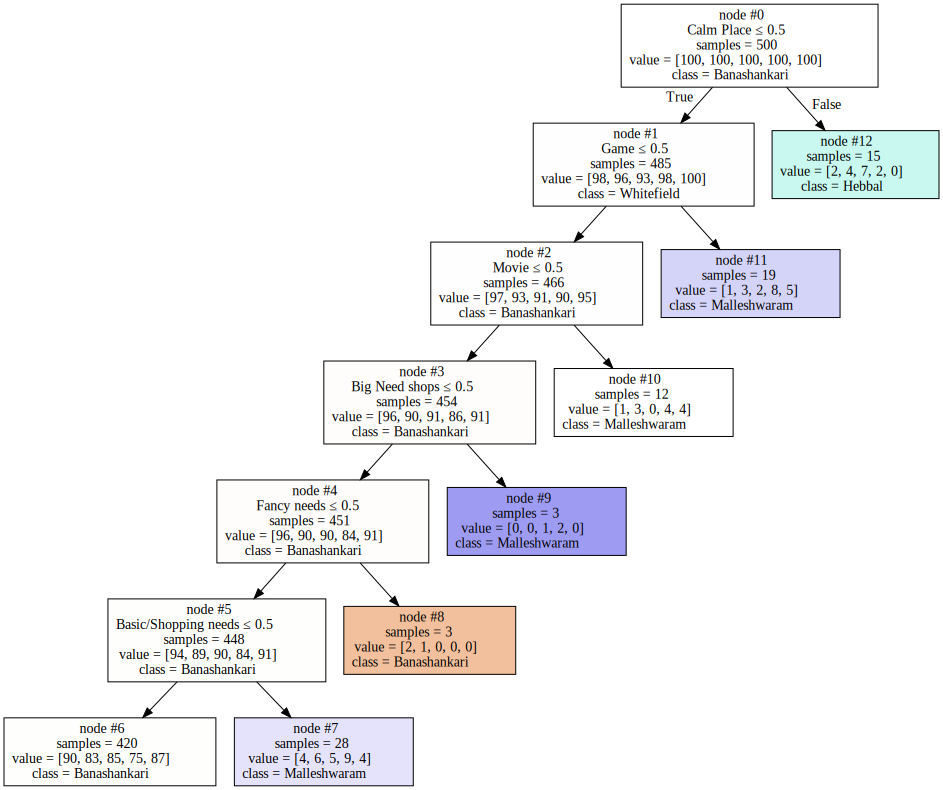

In [24]:
export_graphviz(bamboo_tree,
                feature_names=list(crterias.columns.values),
                out_file="Bangalore_Area_tree.dot",
                class_names=np.unique(Areas),
                filled=True,
                node_ids=True,
                special_characters=True,
                impurity=False,
                label="all",
                leaves_parallel=False)

with open("Bangalore_Area_tree.dot") as bamboo_tree_image:
    bamboo_tree_graph = bamboo_tree_image.read()
graphviz.Source(bamboo_tree_graph)

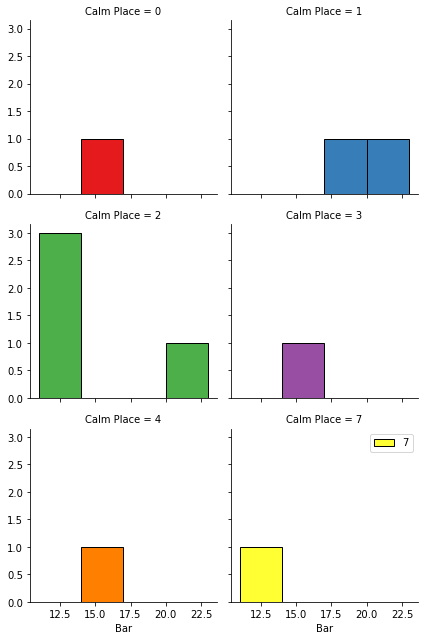

In [26]:
import seaborn as sns

bins = np.linspace(s.Bar.min(), s.Bar.max(), 5)
g = sns.FacetGrid(s, col="Calm Place",hue="Calm Place", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Bar', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

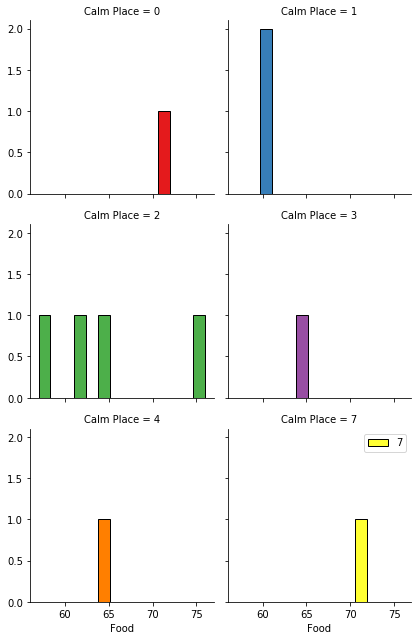

In [27]:
bins = np.linspace(s.Food.min(), s.Food.max(), 15)
g = sns.FacetGrid(s, col="Calm Place", hue="Calm Place", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Food', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

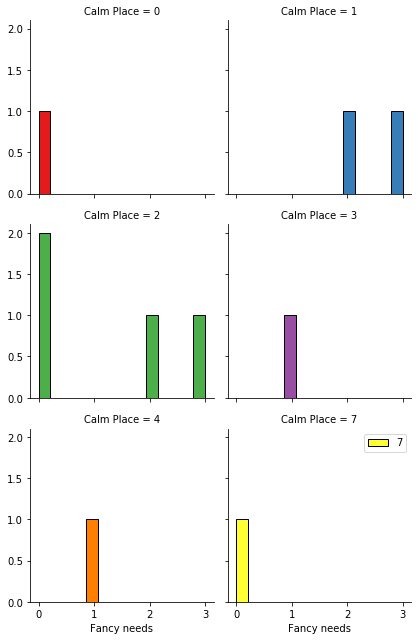

In [28]:
bins = np.linspace(s['Fancy needs'].min(), s['Fancy needs'].max(), 15)
g = sns.FacetGrid(s, col="Calm Place", hue="Calm Place", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Fancy needs', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

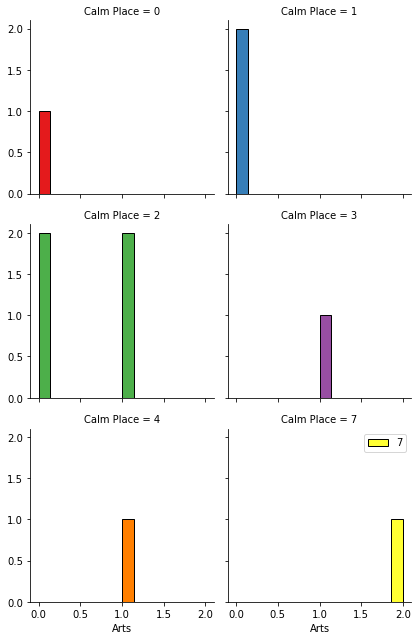

In [29]:
bins = np.linspace(s['Arts'].min(), s['Arts'].max(), 15)
g = sns.FacetGrid(s, col="Calm Place", hue="Calm Place", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Arts', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [30]:
#s.groupby('Area').mean().reset_index()
from sklearn import preprocessing
x = s #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
Areas_Normalized = pd.DataFrame(x_scaled)
Areas_Normalized.columns = s.columns
Areas_Normalized.insert(0, "Area",df['Area Name'].values , True)
Areas_Normalized

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Area,Arts,Bar,Basic/Shopping needs,Big Need shops,Calm Place,Fancy needs,Food,Game,Movie,Other,Work
0,Banashankari,0.5,0.083333,0.000000,0.0,0.285714,0.666667,1.000000,0.000,0.25,1.0,0.0
1,Basavanagudi,0.5,0.416667,0.285714,0.0,0.571429,0.333333,0.421053,0.250,0.75,1.0,0.0
2,Hebbal,1.0,0.000000,0.142857,0.5,1.000000,0.000000,0.736842,0.125,0.00,0.0,0.5
3,Indira Nagar,0.0,0.833333,1.000000,0.0,0.142857,1.000000,0.157895,0.375,0.00,0.0,0.0
4,Jayanagar,0.5,0.333333,0.428571,0.0,0.428571,0.333333,0.421053,0.250,1.00,1.0,0.0
5,Koramangala,0.0,0.583333,0.857143,0.0,0.142857,0.666667,0.157895,0.375,1.00,0.0,0.5
6,Malleshwaram,0.5,0.083333,0.714286,1.0,0.285714,0.000000,0.263158,0.875,1.00,0.0,0.0
7,Marathahalli,0.0,0.083333,0.285714,1.0,0.285714,0.000000,0.421053,1.000,0.50,0.0,1.0
8,Ulsoor,0.0,1.000000,0.857143,0.0,0.285714,1.000000,0.000000,0.500,0.00,0.0,0.0
9,Whitefield,0.0,0.250000,0.000000,0.0,0.000000,0.000000,0.736842,0.500,1.00,1.0,0.5


In [31]:
df

,Area Name,Latitude,Longitude
6,Banashankari,12.925453,77.546761
8,Basavanagudi,12.942117,77.575361
4,Hebbal,13.035781,77.597008
0,Indira Nagar,12.971891,77.641151
5,Jayanagar,12.927501,77.582774
3,Koramangala,12.934533,77.626579
2,Malleshwaram,13.005459,77.569199
1,Marathahalli,12.951845,77.699577
7,Ulsoor,12.975500,77.618200
9,Whitefield,12.971389,77.750130


#### Let's print each neighborhood along with the top 5 most common venues

In [32]:
num_top_venues = 9

for Area in df['Area Name']:
    print("----"+Area+"----")
    temp = Areas_Normalized[Areas_Normalized['Area'] == Area].T.reset_index()
    temp.columns = ['venue','Top most Happening Places']
    temp = temp.iloc[1:]
    temp['Top most Happening Places'] = temp['Top most Happening Places'].astype(float)
    temp = temp.round({'Top most Happening Places': 2})
    print(temp.sort_values('Top most Happening Places', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Banashankari----
                  venue  Top most Happening Places
0                  Food                       1.00
1                 Other                       1.00
2           Fancy needs                       0.67
3                  Arts                       0.50
4            Calm Place                       0.29
5                 Movie                       0.25
6                   Bar                       0.08
7  Basic/Shopping needs                       0.00
8        Big Need shops                       0.00


----Basavanagudi----
                  venue  Top most Happening Places
0                 Other                       1.00
1                 Movie                       0.75
2            Calm Place                       0.57
3                  Arts                       0.50
4                   Bar                       0.42
5                  Food                       0.42
6           Fancy needs                       0.33
7  Basic/Shopping needs               

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [33]:
Feature = Bangalore_Mainonehot[['Food','Bar','Game','Arts','Movie','Basic/Shopping needs','Fancy needs','Work','Calm Place','Big Need shops']]
X = Feature
X[0:5]

,Food,Bar,Game,Arts,Movie,Basic/Shopping needs,Fancy needs,Work,Calm Place,Big Need shops
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [34]:
y = Bangalore_Mainonehot['Area'].values
y[0:5]

array(['Banashankari', 'Banashankari', 'Banashankari', 'Banashankari',
       'Banashankari'], dtype=object)

In [35]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.73057671, -0.42665337, -0.21453462, -0.0776931 , -0.14998296,
        -0.27854301, -0.11020775, -0.07088812, -0.15681251, -0.07088812],
       [ 0.73057671, -0.42665337, -0.21453462, -0.0776931 , -0.14998296,
        -0.27854301, -0.11020775, -0.07088812, -0.15681251, -0.07088812],
       [ 0.73057671, -0.42665337, -0.21453462, -0.0776931 , -0.14998296,
        -0.27854301, -0.11020775, -0.07088812, -0.15681251, -0.07088812],
       [ 0.73057671, -0.42665337, -0.21453462, -0.0776931 , -0.14998296,
        -0.27854301, -0.11020775, -0.07088812, -0.15681251, -0.07088812],
       [-1.36878165,  2.34382305, -0.21453462, -0.0776931 , -0.14998296,
        -0.27854301, -0.11020775, -0.07088812, -0.15681251, -0.07088812]])

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 10) (800,)
Test set: (200, 10) (200,)


In [40]:
# Best k
from sklearn.neighbors import KNeighborsClassifier
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    #print({0},{1},yhat,y_test)
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.14 , 0.14 , 0.125, 0.12 , 0.125, 0.105, 0.09 , 0.105, 0.105,
       0.09 , 0.08 , 0.08 , 0.08 , 0.075])

In [41]:
# Modeling

k = 10
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [42]:
yhat = kNN_model.predict(X_test)
yhat[0:5]

array(['Indira Nagar', 'Koramangala', 'Koramangala', 'Koramangala',
       'Basavanagudi'], dtype=object)

In [43]:
knn_yhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, knn_yhat))
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN Jaccard index: 0.09
KNN F1-score: 0.05


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<a id='item4'></a>

<a id='item5'></a>